In [2]:
from vampyr import vampyr3d as vp
import numpy as np
import matplotlib.pyplot as plt

# Scaling and wavelet functions

First we need to select our scaling functions $\{\phi_i\}_{i=0}^k$. In general we choose or scaling functions $\phi_i$to be either [Legendre Polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials) or [Interpolating Polynomials](https://en.wikipedia.org/wiki/Polynomial_interpolation). I'll use Legendre Polynomials in these examples.

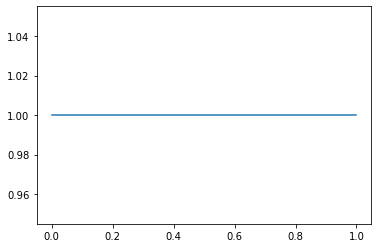

In [4]:
from vampyr import LegendreBasis

basis_set = LegendreBasis(5)
scaling = basis_set.scaling


x = np.arange(0.0, 1.0, 0.001)
y = [scaling(i=0)([_]) for _ in x] # Luca, er det rett å si consant, linear, quadratic, cubic
plt.plot(x, y)

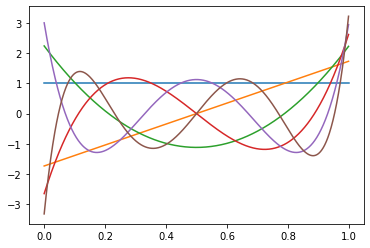

In [3]:
x = np.arange(0.0, 1.0, 0.001)
for i in range(6):
    y = [scaling(i=i)([x]) for x in x]
    plt.plot(x, y)

Let's have a MultiResolution of of these scaling functions, we do this by dilation and translation

\begin{align}
    \phi_{i, l}^n(x) &= 2^{n/2} \phi_i(2^nx - l)
\end{align}

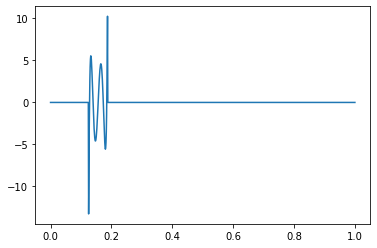

In [4]:
x = np.arange(0.0, 1.0, 0.001)
y = [scaling(i=i, l=2, n=4)([x]) for x in x]
plt.plot(x, y)

Now let's introduce our wavelet functions $\psi_{i, l}^n$. They are connected to the scaling functions through the two-scale difference relation:

\begin{align}
\phi_i(x) = \sqrt{2} \sum_j h^{(0)}_{ij} \phi_j(2x) + h^{(1)}_{ij} \phi_j(2x-1) \\
\psi_i(x) = \sqrt{2} \sum_j g^{(0)}_{ij} \phi_j(2x) + g^{(1)}_{ij} \phi_j(2x-1) \\
\end{align}


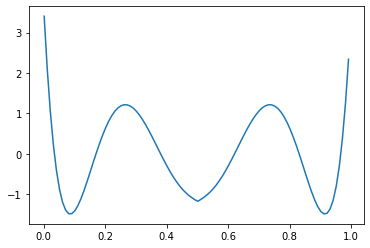

In [5]:
wavelet = basis_set.wavelet


x = np.arange(0.001, 1.0, 0.01)
y = [wavelet(i=0)([_]) for _ in x]
plt.plot(x, y)

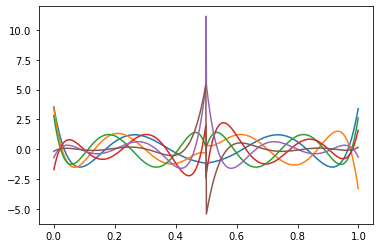

In [6]:
x = np.arange(0.0, 1.0, 0.001)
for i in range(6):
    y = [wavelet(i=i, n=0)([x]) for x in x]
    plt.plot(x, y)

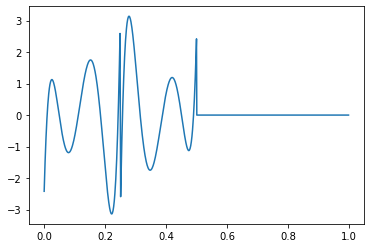

In [7]:
x = np.arange(0.0, 1.0, 0.001)
y = [wavelet(i=3, l=0, n=1)([x]) for x in x]
plt.plot(x, y)

# Scaling Projectors


Let's introduce the Scaling Projectior $P^n_k$. This operator projects the function $f$ onto the
scaling basis $\{\phi_{j,l}^n\}$. I.e.,

\begin{align}
f^n(x) = P^n_k [f(x)] = \sum_{l=0}^{2^n-1} \sum_{j=0}^k s_{j, l}^{n,f} \phi_{j,l}^n(x) 
\end{align}


Let's use it and plot some functions

In [29]:
from vampyr import vampyr3d as vp

r0 = [0.8, 0.8, 0.8]
beta = 100.0 # Do 100 and 1000000
alpha = (beta / np.pi) ** (3 / 2.0)
f = vp.GaussFunc(coef=alpha, exp=beta, pos=r0)

#def f(r):
#    r0 = [0.8, 0.8, 0.8]
#    beta = 10
#    alpha = (beta / np.pi)**(3/2.0)
#    return alpha*np.exp(beta*((r[0]-r0[0])**2))

In [30]:
mra = vp.MultiResolutionAnalysis(box=[0, 2], order=5)

P0 = vp.ScalingProjector(mra, 0)
P1 = vp.ScalingProjector(mra, 1)
P2 = vp.ScalingProjector(mra, 2)
P3 = vp.ScalingProjector(mra, 3)
P4 = vp.ScalingProjector(mra, 4)

f0 = P0(f)
f1 = P1(f)
f2 = P2(f)
f3 = P3(f)
f4 = P4(f)

These projectors mean you project onto the following basis functions

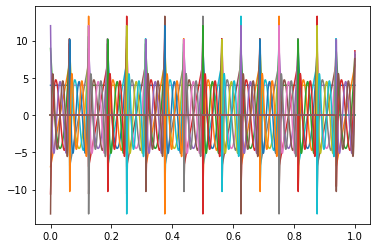

In [31]:
n = 4
x = np.arange(0.0, 1.0, 0.001)
for l in range(2**n):
    for i in range(6):
        y = [scaling(i=i, l=l, n=n)([x]) for x in x]
        plt.plot(x, y)

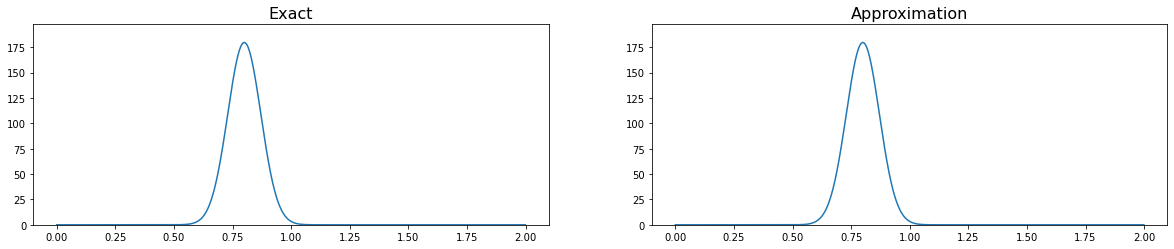

In [32]:
x = np.arange(0.0, 2.0, 0.001)
plt.subplot(6,2,1)
plt.plot(x, [f([_, 0.8, 0.8]) for _ in x]) # Plot same size?
plt.ylim([0.0, alpha*1.1])
plt.title("Exact", size=16)
plt.subplot(6,2,2)
plt.plot(x, [f4([_, 0.8, 0.8]) for _ in x])
plt.ylim([0.0, alpha*1.1])
plt.title("Approximation", size=16)
plt.subplots_adjust(top=5, right=2.75)

# Wavelet Projectors


Next let's introduce the Wavelet Projector $Q^n_k$. This operator projects the function $f$ onto the
wavelet basis $\{\psi_{j,l}^n\}$. I.e.,

\begin{align}
df^n(x) = Q^n_k [f(x)] = \sum_{l=0}^{2^n-1} \sum_{j=0}^k w_{j, l}^{n,f} \psi_{j,l}^n(x) 
\end{align}


The Wavelet Projector $Q^n_k$ is related to the Scaling Projector $P^n_k$ through the relation 

\begin{align}
P^{n+1}_k = P^n_k + Q^n_k
\end{align}

This leads to the following relation

\begin{align}
P^{n+1}_k = P^0_k + Q^n_k + Q^{n-1}_k +... + Q^0_k
\end{align}


In [33]:
Q0 = vp.WaveletProjector(mra, 0)
Q1 = vp.WaveletProjector(mra, 1)
Q2 = vp.WaveletProjector(mra, 2)
Q3 = vp.WaveletProjector(mra, 3)
Q4 = vp.WaveletProjector(mra, 4)

df0 = Q0(f)
df1 = Q1(f)
df2 = Q2(f)
df3 = Q3(f)
df4 = Q4(f)



In [ ]:
f_0 = P_0(f)
df = []
df.append[Q_0(f)]
df.append[Q_1(f)]
df.append[Q_2(f)]
f_3 = f_0 + vp.sum(df)

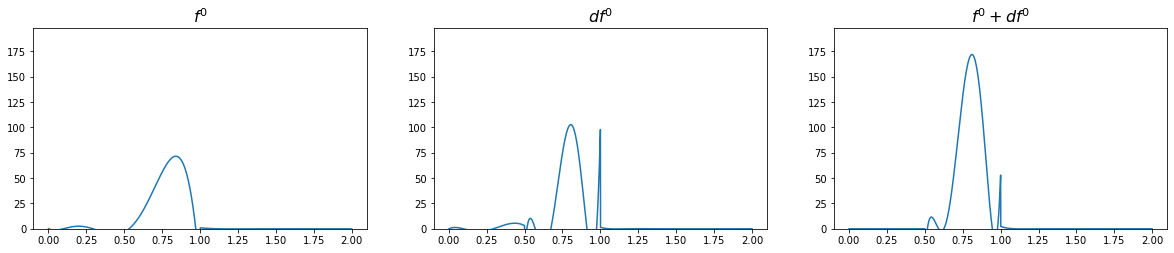

In [34]:
from plot_diff import plot_diff
plot_diff(0, f0, df0, alpha)

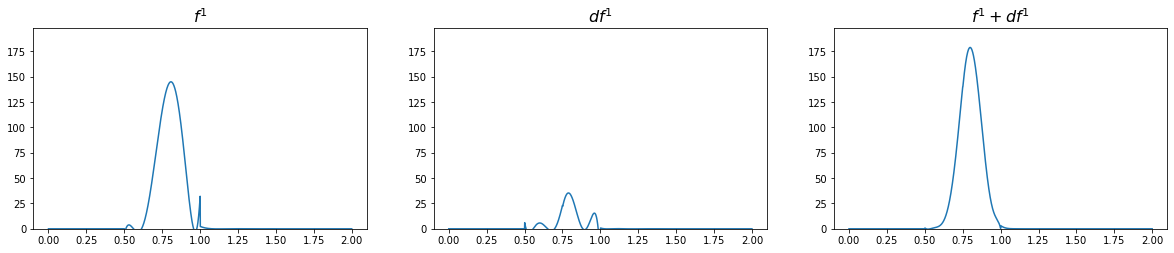

In [35]:
plot_diff(1, f1, df1, alpha)

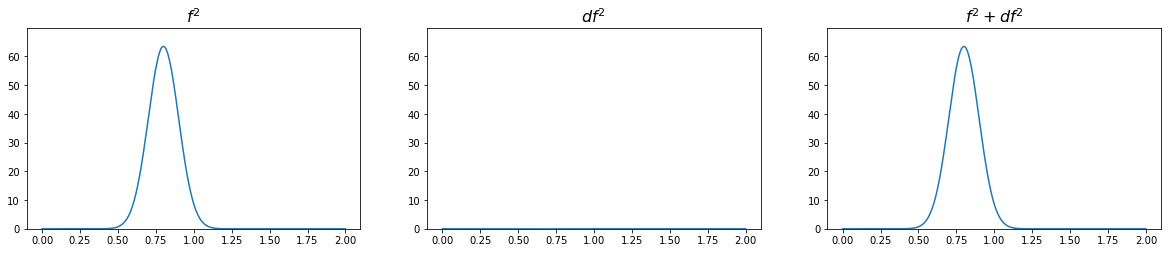

In [43]:
plot_diff(2, f2, df2, alpha)

The power of Multiwavelets comes from the error control, where we can request a relative precision 

\begin{align}
||f - f^n|| < \epsilon ||f||
\end{align}

by applying the truncation test 

\begin{align}
||df^n|| < 2^{-dn/2}\epsilon ||f||
\end{align}


Let's see what this looks like

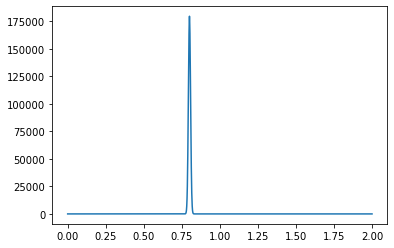

In [36]:
r0 = [0.8, 0.8, 0.8]
beta = 10000.0 # Do 100 and 1000
alpha = (beta / np.pi) ** (3 / 2.0)
f = vp.GaussFunc(coef=alpha, exp=beta, pos=r0)

P_eps = vp.ScalingProjector(mra, prec=1.0e-4)

f_eps = P_eps(f)

x = np.arange(0.0, 2.0, 0.001)
y = [f_eps([x, 0.8, 0.8]) for x in x]
plt.plot(x, y)

In [37]:
print(f_eps, f4)


*FunctionTree: nn
  genNodes: 0
  square norm: 63493.6
  root scale: -1
  order: 5
  nodes: 537
  endNodes: 470
  nodes per scale: 
    scale=-1  nodes=1
    scale=0  nodes=8
    scale=1  nodes=8
    scale=2  nodes=8
    scale=3  nodes=8
    scale=4  nodes=8
    scale=5  nodes=64
    scale=6  nodes=216
    scale=7  nodes=208
    scale=8  nodes=8
 
*FunctionTree: nn
  genNodes: 0
  square norm: 63.4936
  root scale: -1
  order: 5
  nodes: 37449
  endNodes: 32768
  nodes per scale: 
    scale=-1  nodes=1
    scale=0  nodes=8
    scale=1  nodes=64
    scale=2  nodes=512
    scale=3  nodes=4096
    scale=4  nodes=32768



(<Figure size 900x900 with 1 Axes>, <Axes3DSubplot:>)

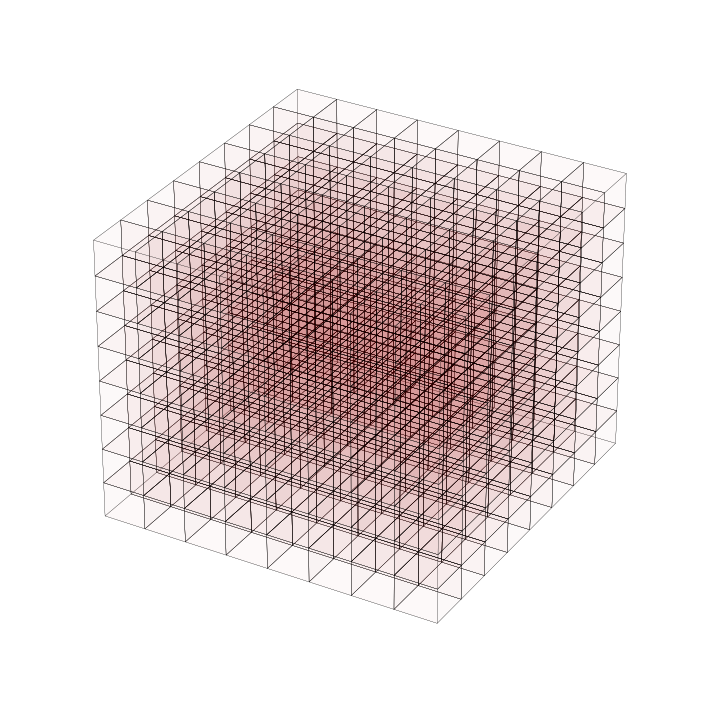

In [40]:
from grid_plotter import grid_plotter

grid_plotter(f2)

In [ ]:
Del 2. 

Introduser Scaling og Wavelet projectors

først en glatt gauss så en spiss

p0, p1, p2

1. p0, ...
2. Qn
3. P^n+1 = sum Q_n + P^0 (print node size) vis at de er like
4. P_eps (print node size) vis at de er like



In [ ]:
world = vp.BoundingBox(nboxes=[2, 2, 2], corner=[-1, -1, -1], scale=-3)

mra = vp.MultiResolutionAnalysis(world, 5)

f = vp.FunctionTree(mra)

f.loadTree("phi_p_scf_idx_0_re")

from grid_plotter import grid_plotter

grid_plotter(f)